### Import Library

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [30]:
data = pd.read_csv('D:\Projects\RA\Mini Project\hotel performance\hotel_bookings_data.csv')
pd.set_option("display.max_columns", None)
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
69775,City Hotel,1,12,2019,August,23,6,0,1,2,0.0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,140.0,0,1,Canceled
35025,Resort Hotel,0,35,2019,June,14,8,2,2,2,0.0,0,Breakfast,Kota Cimahi,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,75.0,0,1,Check-Out
109522,City Hotel,0,6,2019,June,15,10,1,2,2,0.0,0,Breakfast,Kota Cimahi,Direct,Direct,0,0,0,0,No Deposit,14.0,NaN,0,Personal,135.0,0,1,Check-Out
80468,City Hotel,1,34,2017,February,50,8,0,2,1,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,1,0,0,Non Refund,19.0,NaN,0,Personal,90.0,0,0,Canceled
104447,City Hotel,0,65,2019,March,2,12,0,2,1,0.0,0,Breakfast,Kabupaten Bandung,Groups,TA/TO,0,0,0,0,No Deposit,NaN,366.0,0,Family,65.0,0,0,Check-Out


In [31]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


### Data Preprocessing

#### Check Data Type

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Data type of agent and company should be object, since the values represent the ID of the agent that made the booking and the ID of the company respectively.

Data type of children also should be integer.

To change the data type from float to object/string, change them into integer first to avoid the decimal-form values. To do so, null values in those columns should be filled with a number, 0.

Since the null values in children column means there is no children, we assigned 0 into it.

In [33]:
# Change data type
data['company'] = data['company'].fillna(0).astype(int)
data['company'] = data['company'].astype(str)
data.loc[data['company'] == '0', "company"] = np.nan

data['agent'] = data['agent'].fillna(0).astype(int)
data['agent'] = data['agent'].astype(str)
data.loc[data['agent'] == '0', "agent"] = np.nan

data['children'] = data['children'].fillna(0).astype(int)

#### Handle Missing Values

In [34]:
data.isnull().sum()/len(data)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_weekdays_nights           0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
city                               0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             13.686238
company                         

Since the missing values of company column is up to 94%, we can drop this column

In [35]:
data = data.drop(['company'], axis=1)

Since the null values in agent column possibly means that the booking wasn't through any agent, then we assigned "No Agent" into it as a value.

In [36]:
data['agent'] = data['agent'].fillna("No Agent")

Fill null values in city column with the highest frequency value (mode)

In [37]:
data['city'] = data['city'].fillna(data['city'].mode()[0])

#### Handle Invalid Values

In [38]:
num_cols = data.select_dtypes(include = 'number').columns
cat_cols = data.select_dtypes(include = 'object').columns

In [39]:
# statictic descriptive categorical columns
data[cat_cols].describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,119390,177,Kota Denpasar,49078
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
agent,119390,334,9,31961
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


1. Replace 'Undefined' values in meal column with 'No Meal'

In [40]:
data['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [41]:
data.loc[data['meal']=='Undefined', 'meal'] = 'No Meal'

2. Replace 'Undefined' values in market_segment with the highest frequency value (mode)

In [42]:
data['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [43]:
data.loc[data['market_segment']=='Undefined', 'market_segment'] = data['market_segment'].mode()[0]

3. Replace 'Undefined' values in distribution_channel with the highest frequency value (mode)

In [44]:
data['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [45]:
data['distribution_channel'].replace('Undefined', 'TA/TO', inplace = True)

In [46]:
# statictic descriptive numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


4. Replace 53 in arrival_date_week_number to 52, because there are only 52 weeks in 2017, 2018, and 2019.

In [47]:
data.loc[data['arrival_date_week_number'] == 53.0, "arrival_date_week_number"] = 52

5. Delete row data consist of negative ADR, because it's not possible that room price is negative

In [48]:
data = data[data['adr'] > 0]

6. Delete row data with ADR 5,400. It seems like a data entry error.

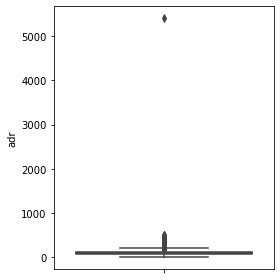

In [49]:
plt.figure(figsize=(4,4))
sns.boxplot(y=data['adr'], color="#467599", orient='v')
plt.tight_layout()
plt.show()

In [50]:
data.drop(data[data['adr']==5400.0].index, inplace=True)

7. Delete row data with 0 in adults column, because most of hotels won't permit anybody younger than 18 to stay in a room unaccompanied.

In [51]:
data = data.loc[data['adults'] > 0]

### Monthly Hotel Booking Analysis Based on Hotel Type

#### Total Booking per Month

In [52]:
# aggregation table of number of booking per month each hotel type
hotel_month = data.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
hotel_month

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4855
1,City Hotel,August,2,7802
2,City Hotel,December,2,7451
3,City Hotel,February,2,3985
4,City Hotel,January,2,4254
5,City Hotel,July,2,8102
6,City Hotel,June,2,7384
7,City Hotel,March,2,3652
8,City Hotel,May,2,6347
9,City Hotel,November,2,7269


#### Average Booking per Month

In [53]:
# normalize data by averaging it
hotel_month['average'] = round(hotel_month['count']/hotel_month['nunique'],0)
hotel_month

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4855,2428.0
1,City Hotel,August,2,7802,3901.0
2,City Hotel,December,2,7451,3726.0
3,City Hotel,February,2,3985,1992.0
4,City Hotel,January,2,4254,2127.0
5,City Hotel,July,2,8102,4051.0
6,City Hotel,June,2,7384,3692.0
7,City Hotel,March,2,3652,1826.0
8,City Hotel,May,2,6347,3174.0
9,City Hotel,November,2,7269,3634.0


#### Sort Data by Month

In [54]:
hotel_month['month'] = hotel_month['arrival_date_month'].str[:3]
hotel_month['month'] = pd.Categorical(hotel_month['month'], categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
hotel_month = hotel_month.sort_values('month')

In [55]:
hotel_month

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,4254,2127.0,Jan
16,Resort Hotel,January,2,2375,1188.0,Jan
3,City Hotel,February,2,3985,1992.0,Feb
15,Resort Hotel,February,2,2552,1276.0,Feb
7,City Hotel,March,2,3652,1826.0,Mar
19,Resort Hotel,March,2,2130,1065.0,Mar
0,City Hotel,April,2,4855,2428.0,Apr
12,Resort Hotel,April,2,3046,1523.0,Apr
20,Resort Hotel,May,2,3272,1636.0,May
8,City Hotel,May,2,6347,3174.0,May


#### Average Booking per Month Visualization

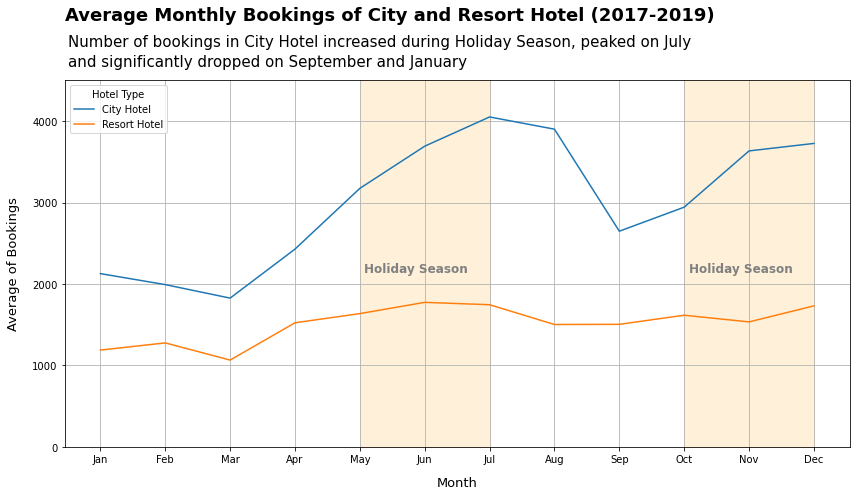

In [56]:
# set the plot
plt.figure(figsize=(12,7))
ax = sns.lineplot(x='month', y='average', hue='hotel', data=hotel_month)
plt.ylim(0,4500)
plt.xlabel('Month', labelpad=12, fontsize=13)
plt.ylabel('Average of Bookings', labelpad=12, fontsize=13)
ax.set_yticks([0, 1000, 2000, 3000, 4000])
plt.legend(title='Hotel Type', loc='upper left')

# fill a specific area with color
plt.fill_between(x=np.arange(4,7), y1=4500, color='orange', alpha=0.15)
plt.fill_between(x=np.arange(9,12), y1=4500, color='orange', alpha=0.15)
plt.grid()

# add some texts
plt.title('Average Monthly Bookings of City and Resort Hotel (2017-2019)', fontsize=18,
         fontweight='bold',loc='left', pad=60)
plt.text(s='Number of bookings in City Hotel increased during Holiday Season, peaked on July',
         x=-0.5, y=4925, fontsize=15)
plt.text(s='and significantly dropped on September and January',
         x=-0.5, y=4675, fontsize=15)
plt.text(s='Holiday Season',
         x=4.07, y=2150, fontsize=12, color='gray', fontweight='bold')
plt.text(s='Holiday Season',
         x=9.07, y=2150, fontsize=12, color='gray', fontweight='bold')

# save the plot
plt.tight_layout()
plt.savefig('Average Monthly Bookings of City and Resort Hotel.png')

### Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [57]:
# create new column represent the total lenght of stay
data['stay_duration'] = data['stays_in_weekdays_nights'] + data['stays_in_weekend_nights']
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration
34572,Resort Hotel,0,163,2019,May,13,29,0,1,2,0,0,Dinner,Kota Cimahi,Online TA,TA/TO,0,0,0,2,No Deposit,240,0,Personal,78.00,1,1,Check-Out,1
55912,City Hotel,1,106,2018,October,35,24,0,4,3,0,0,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,Personal,152.10,0,0,Canceled,4
100371,City Hotel,0,13,2018,December,44,26,0,1,1,0,0,Breakfast,Kota Yogyakarta,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,118,0,Personal,90.00,0,1,Check-Out,1
102777,City Hotel,0,38,2018,February,49,2,2,2,2,0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,1,No Deposit,9,0,Personal,77.86,0,1,Check-Out,4
2476,Resort Hotel,0,5,2017,December,43,19,1,0,1,0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,No Agent,0,Personal,37.00,0,0,Check-Out,1


<AxesSubplot:xlabel='stay_duration', ylabel='Count'>

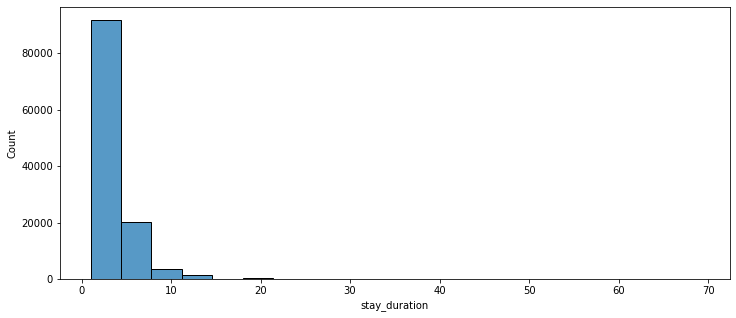

In [58]:
# visualize stay duration distribution
plt.figure(figsize=(12,5))
sns.histplot(data['stay_duration'], bins=20)

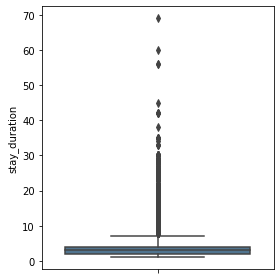

In [59]:
plt.figure(figsize=(4,4))
sns.boxplot(y=data['stay_duration'], color="#467599")
plt.tight_layout()
plt.show()

In [60]:
q1 = data['stay_duration'].quantile(0.25)
q3 = data['stay_duration'].quantile(0.75)
q2 = data['stay_duration'].quantile(0.5)
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5*iqr

low_lim, min(data['stay_duration']), q1, q2, q3, up_lim, max(data['stay_duration'])

(-1.0, 1, 2.0, 3.0, 4.0, 7.0, 69)

In [61]:
# bin the stay duration based on quantiles
group_names = ['1 - 2','3','4','5 - 7','8 or higher']
data['stay_duration_group'] = pd.cut(data['stay_duration'], 
                                     [0, q1, q2, q3, up_lim, max(data['stay_duration'])], 
                                     labels=group_names)

In [62]:
data.loc[data['stay_duration']==1].sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration,stay_duration_group
32612,Resort Hotel,0,2,2019,March,5,29,1,0,1,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Family,58.00,0,1,Check-Out,1,1 - 2
30540,Resort Hotel,0,11,2018,January,48,25,0,1,2,0,0,Dinner,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,241,0,Personal,68.03,0,1,Check-Out,1,1 - 2
20383,Resort Hotel,0,0,2018,March,5,26,0,1,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,No Agent,0,Personal,39.00,0,0,Check-Out,1,1 - 2
116795,City Hotel,0,24,2019,September,30,24,1,0,2,0,0,No Meal,Kota Jakarta Timur,Online TA,TA/TO,0,0,0,0,No Deposit,7,0,Personal,86.40,0,1,Check-Out,1,1 - 2
49159,City Hotel,1,10,2018,June,15,7,0,1,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,Personal,101.00,0,0,Canceled,1,1 - 2


In [63]:
# aggregate data
data_grouped = data.groupby(['hotel', 'is_canceled', 'stay_duration_group'])['arrival_date_year'].count().reset_index()
cancel_pct = pd.pivot_table(data_grouped,
                            index=['hotel', 'stay_duration_group'],
                            columns='is_canceled',
                            values='arrival_date_year').reset_index()
cancel_pct.columns = ['hotel', 'stay_duration_group', 'is_not_canceled', 'is_canceled']
cancel_pct['% cancel'] = round(cancel_pct['is_canceled'] / (cancel_pct['is_not_canceled'] + cancel_pct['is_canceled'])*100,2)
cancel_pct

,hotel,stay_duration_group,is_not_canceled,is_canceled,% cancel
0,City Hotel,1 - 2,19503,14446,42.55
1,City Hotel,3,11772,9452,44.53
2,City Hotel,4,7643,4817,38.66
3,City Hotel,5 - 7,5528,3503,38.79
4,City Hotel,8 or higher,538,672,55.54
5,Resort Hotel,1 - 2,10887,2858,20.79
6,Resort Hotel,3,3796,1856,32.84
7,Resort Hotel,4,3301,1494,31.16
8,Resort Hotel,5 - 7,7508,3627,32.57
9,Resort Hotel,8 or higher,2777,1203,30.23


#### Visualization

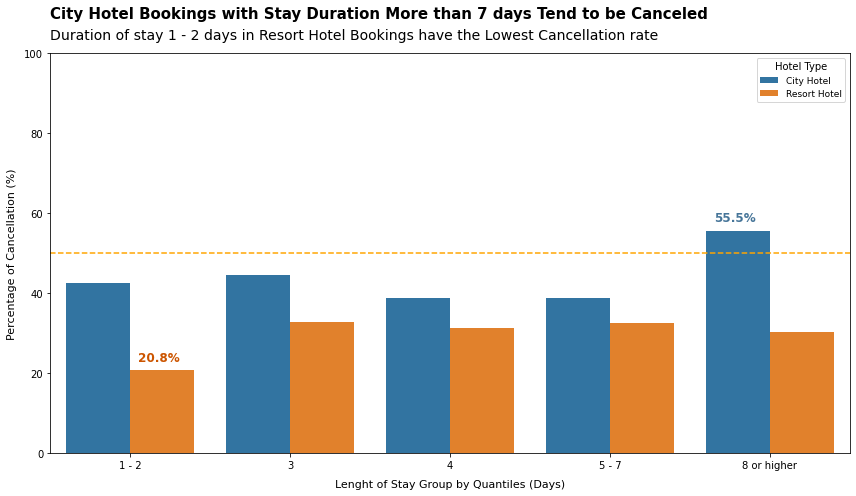

In [64]:
# set the plot
plt.figure(figsize=(12,7))
sns.barplot(x='stay_duration_group', y='% cancel', hue='hotel', data=cancel_pct)
plt.ylim(0,100)
plt.xlabel('Lenght of Stay Group by Quantiles (Days)', labelpad=9, fontsize=11)
plt.ylabel('Percentage of Cancellation (%)', labelpad=7, fontsize=11)
plt.axhline(y=50, color='orange', ls='--')
plt.legend(title='Hotel Type', loc='upper right', fontsize=9)

# add some texts
plt.title('City Hotel Bookings with Stay Duration More than 7 days Tend to be Canceled ', fontsize=15,
         fontweight='bold',loc='left', pad=35)
plt.text(s='Duration of stay 1 - 2 days in Resort Hotel Bookings have the Lowest Cancellation rate',
         x=-0.5, y=103.5, fontsize=14)
plt.text(s='55.5%',
          x=3.65, y=58, fontsize=12, color='#467599', fontweight='bold')
plt.text(s='20.8%',
          x=0.05, y=23, fontsize=12, color='#CC5500', fontweight='bold')

# save the plot
plt.tight_layout()
plt.savefig('Stay Duration on Hotel Bookings Cancellation Rates.png')

### Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

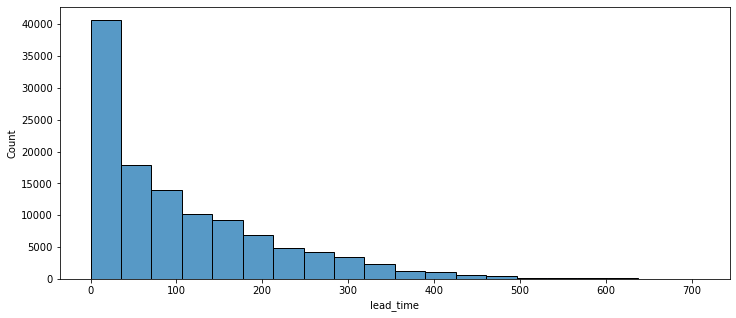

In [65]:
# visualize lead time distribution
plt.figure(figsize=(12,5))
sns.histplot(data['lead_time'], bins=20)

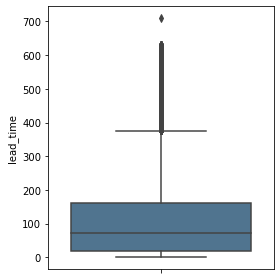

In [66]:
plt.figure(figsize=(4,4))
sns.boxplot(y=data['lead_time'], color="#467599")
plt.tight_layout()
plt.show()

In [67]:
q1 = data['lead_time'].quantile(0.25)
q3 = data['lead_time'].quantile(0.75)
q2 = data['lead_time'].quantile(0.5)
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5*iqr

low_lim, min(data['lead_time']), q1, q2, q3, up_lim, max(data['lead_time'])

(-195.5, 0, 19.0, 71.0, 162.0, 376.5, 709)

In [68]:
# bin the lead time based on quantiles
group_names = ['0 - 19','20 - 71','72 - 162','163 - 377','378 or higher']
data['lead_time_group'] = pd.cut(data['lead_time'], 
                                     [-1, q1, q2, q3, 377, max(data['lead_time'])], 
                                     labels=group_names)

In [69]:
data.loc[data['lead_time']==0].sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration,stay_duration_group,lead_time_group
108146,City Hotel,0,0,2019,May,12,22,0,1,2,0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,94,0,Personal,65.0,0,1,Check-Out,1,1 - 2,0 - 19
54098,City Hotel,1,0,2018,September,28,7,0,1,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,No Agent,0,Personal,249.0,0,0,Canceled,1,1 - 2,0 - 19
17520,Resort Hotel,1,0,2019,March,4,26,0,1,1,0,0,Breakfast,Kota Denpasar,Corporate,Corporate,1,0,5,0,No Deposit,No Agent,0,Personal,35.0,0,0,No-Show,1,1 - 2,0 - 19
98299,City Hotel,0,0,2018,November,40,27,0,1,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,No Agent,0,Personal,150.0,0,0,Check-Out,1,1 - 2,0 - 19
77847,City Hotel,0,0,2017,November,39,25,2,2,2,0,0,Breakfast,Kabupaten Kuningan,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,Personal,180.0,0,1,Check-Out,4,4,0 - 19


In [70]:
# aggregate data
data_grouped = data.groupby(['hotel', 'is_canceled', 'lead_time_group'])['arrival_date_year'].count().reset_index()
cancel_pct = pd.pivot_table(data_grouped,
                            index=['hotel', 'lead_time_group'],
                            columns='is_canceled',
                            values='arrival_date_year').reset_index()
cancel_pct.columns = ['hotel', 'lead_time_group', 'is_not_canceled', 'is_canceled']
cancel_pct['% cancel'] = round(cancel_pct['is_canceled'] / (cancel_pct['is_not_canceled'] + cancel_pct['is_canceled'])*100,2)
cancel_pct

,hotel,lead_time_group,is_not_canceled,is_canceled,% cancel
0,City Hotel,0 - 19,14108,3272,18.83
1,City Hotel,20 - 71,12389,8016,39.28
2,City Hotel,72 - 162,11094,9173,45.26
3,City Hotel,163 - 377,6701,10667,61.42
4,City Hotel,378 or higher,692,1762,71.80
5,Resort Hotel,0 - 19,11048,1290,10.46
6,Resort Hotel,20 - 71,6226,2622,29.63
7,Resort Hotel,72 - 162,5513,3394,38.10
8,Resort Hotel,163 - 377,5263,3535,40.18
9,Resort Hotel,378 or higher,219,197,47.36


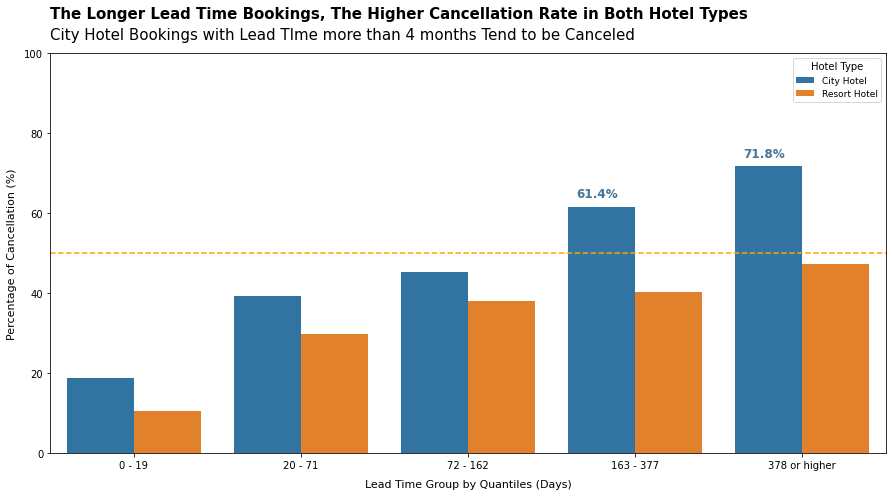

In [71]:
# set the plot
plt.figure(figsize=(12.5,7))
sns.barplot(x='lead_time_group', y='% cancel', hue='hotel', data=cancel_pct)
plt.ylim(0,100)
plt.xlabel('Lead Time Group by Quantiles (Days)', labelpad=9, fontsize=11)
plt.ylabel('Percentage of Cancellation (%)', labelpad=7, fontsize=11)
plt.axhline(y=50, color='orange', ls='--')
plt.legend(title='Hotel Type', loc='upper right', fontsize=9)

# add some texts
plt.title('The Longer Lead Time Bookings, The Higher Cancellation Rate in Both Hotel Types', fontsize=15,
         fontweight='bold',loc='left', pad=35)
plt.text(s='City Hotel Bookings with Lead TIme more than 4 months Tend to be Canceled',
         x=-0.5, y=103.5, fontsize=15)
plt.text(s='61.4%',
          x=2.65, y=64, fontsize=12, color='#467599', fontweight='bold')
plt.text(s='71.8%',
          x=3.65, y=74, fontsize=12, color='#467599', fontweight='bold')

# save the plot
plt.tight_layout()
plt.savefig('Lead Time on Hotel Bookings Cancellation Rates.png')